<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,34.281990,67.902847,62.618707,25.588225,0.004549,200.396319,200.392165,0.004154
1,0.0,1.0,93.060832,57.288269,53.041716,50.641461,0.005192,264.037470,264.029663,0.007808
2,0.0,2.0,44.571402,48.382655,73.330392,27.306013,-0.001492,203.588970,203.589293,-0.000323
3,0.0,3.0,50.971896,33.262060,91.295650,25.128616,-0.000225,210.657996,210.655567,0.002429
4,0.0,4.0,65.277712,71.294938,99.906383,54.956821,0.000476,301.436330,301.435039,0.001291
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.194594,23.018938,44.441230,99.591060,0.031283,238.277104,238.245492,0.031611
59996,999.0,56.0,51.562384,69.294341,57.848142,77.616468,0.002364,266.323698,266.323212,0.000486
59997,999.0,57.0,69.329995,33.919310,73.773843,79.605419,-0.020897,266.607670,266.626913,-0.019244
59998,999.0,58.0,45.562863,77.252851,75.769638,22.861741,-0.000894,231.446198,231.449102,-0.002903


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    34.281990  67.902847  62.618707  25.588225  0.004549  200.396319   
      1.0    93.060832  57.288269  53.041716  50.641461  0.005192  264.037470   
      2.0    44.571402  48.382655  73.330392  27.306013 -0.001492  203.588970   
      3.0    50.971896  33.262060  91.295650  25.128616 -0.000225  210.657996   
      4.0    65.277712  71.294938  99.906383  54.956821  0.000476  301.436330   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   61.194594  23.018938  44.441230  99.591060  0.031283  238.277104   
      56.0   51.562384  69.294341  57.848142  77.616468  0.002364  266.323698   
      57.0   69.329995  33.919310  73.773843  79.605419 -0.020897  266.607670   
      58.0   45.562863  77.252851  75.769638  22.861741 -0.000894  231.446198   
      59.0   84.321571  49.280636  54.221253  96.491601 -0.007462  294.307600   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.392165  0.004154  
      1.0    264.029663  0.007808  
      2.0    203.589293 -0.000323  
      3.0    210.655567  0.002429  
      4.0    301.435039  0.001291  
...                 ...       ...  
999.0 55.0   238.245492  0.031611  
      56.0   266.323212  0.000486  
      57.0   266.626913 -0.019244  
      58.0   231.449102 -0.002903  
      59.0   294.312985 -0.005385  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    34.281990  67.902847  62.618707  25.588225  0.004549  200.396319   
      1.0    93.060832  57.288269  53.041716  50.641461  0.005192  264.037470   
      2.0    44.571402  48.382655  73.330392  27.306013 -0.001492  203.588970   
      3.0    50.971896  33.262060  91.295650  25.128616 -0.000225  210.657996   
      4.0    65.277712  71.294938  99.906383  54.956821  0.000476  301.436330   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   61.194594  23.018938  44.441230  99.591060  0.031283  238.277104   
      56.0   51.562384  69.294341  57.848142  77.616468  0.002364  266.323698   
      57.0   69.329995  33.919310  73.773843  79.605419 -0.020897  266.607670   
      58.0   45.562863  77.252851  75.769638  22.861741 -0.000894  231.446198   
      59.0   84.321571  49.280636  54.221253  96.491601 -0.007462  294.307600   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.392165  0.004154  
      1.0    264.029663  0.007808  
      2.0    203.589293 -0.000323  
      3.0    210.655567  0.002429  
      4.0    301.435039  0.001291  
...                 ...       ...  
999.0 55.0   238.245492  0.031611  
      56.0   266.323212  0.000486  
      57.0   266.626913 -0.019244  
      58.0   231.449102 -0.002903  
      59.0   294.312985 -0.005385  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,34.281990,67.902847,62.618707,25.588225,0.004549,200.396319,200.392165,0.004154
1,0.0,1.0,93.060832,57.288269,53.041716,50.641461,0.005192,264.037470,264.029663,0.007808
2,0.0,2.0,44.571402,48.382655,73.330392,27.306013,-0.001492,203.588970,203.589293,-0.000323
3,0.0,3.0,50.971896,33.262060,91.295650,25.128616,-0.000225,210.657996,210.655567,0.002429
4,0.0,4.0,65.277712,71.294938,99.906383,54.956821,0.000476,301.436330,301.435039,0.001291
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.194594,23.018938,44.441230,99.591060,0.031283,238.277104,238.245492,0.031611
59996,999.0,56.0,51.562384,69.294341,57.848142,77.616468,0.002364,266.323698,266.323212,0.000486
59997,999.0,57.0,69.329995,33.919310,73.773843,79.605419,-0.020897,266.607670,266.626913,-0.019244
59998,999.0,58.0,45.562863,77.252851,75.769638,22.861741,-0.000894,231.446198,231.449102,-0.002903


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    34.281990  67.902847  62.618707  25.588225  0.004549  200.396319   
      1.0    93.060832  57.288269  53.041716  50.641461  0.005192  264.037470   
      2.0    44.571402  48.382655  73.330392  27.306013 -0.001492  203.588970   
      3.0    50.971896  33.262060  91.295650  25.128616 -0.000225  210.657996   
      4.0    65.277712  71.294938  99.906383  54.956821  0.000476  301.436330   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   61.194594  23.018938  44.441230  99.591060  0.031283  238.277104   
      56.0   51.562384  69.294341  57.848142  77.616468  0.002364  266.323698   
      57.0   69.329995  33.919310  73.773843  79.605419 -0.020897  266.607670   
      58.0   45.562863  77.252851  75.769638  22.861741 -0.000894  231.446198   
      59.0   84.321571  49.280636  54.221253  96.491601 -0.007462  294.307600   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.392165  0.004154  
      1.0    264.029663  0.007808  
      2.0    203.589293 -0.000323  
      3.0    210.655567  0.002429  
      4.0    301.435039  0.001291  
...                 ...       ...  
999.0 55.0   238.245492  0.031611  
      56.0   266.323212  0.000486  
      57.0   266.626913 -0.019244  
      58.0   231.449102 -0.002903  
      59.0   294.312985 -0.005385  

[60000 rows x 8 columns]

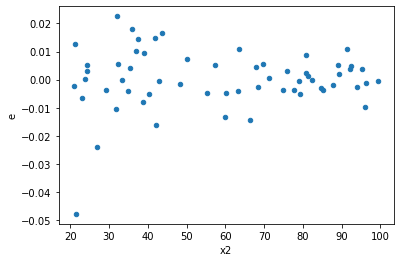

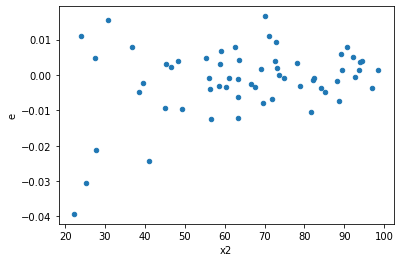

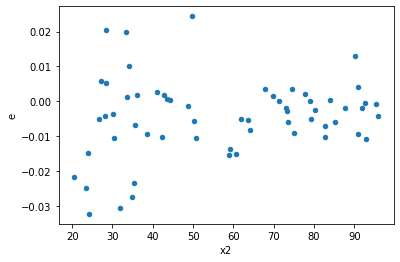

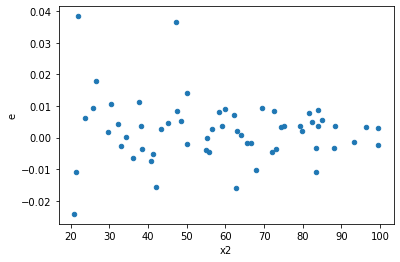

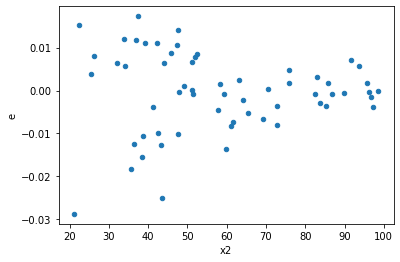

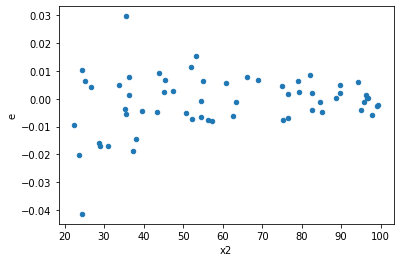

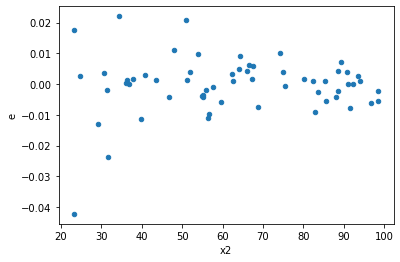

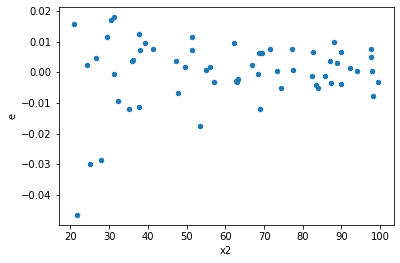

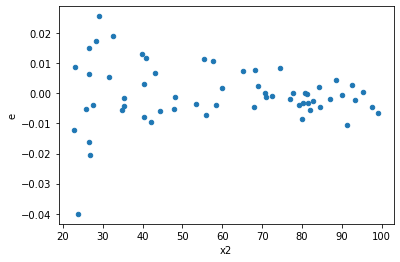

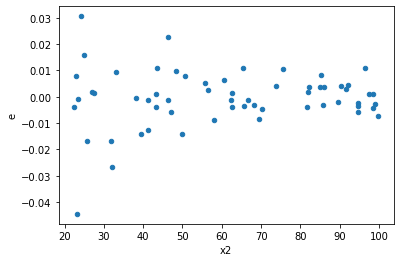

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,20.0,32.0,0.0015580526889048237,0.003941029337985742,7.790263444524119e-05,0.00012315716681205444,1.5809114504160098,0.241426135517127,0.8792869322414365,0.1207130677585635,Reject005=1 : Homoscedasticity
8.0,24.0,28.0,0.0017817064420813829,0.0037758891677014566,7.423776842005762e-05,0.00013485318456076632,1.8165037477652894,0.13018410237626177,0.9349079488118691,0.06509205118813088,Reject005=1 : Homoscedasticity
9.0,23.0,29.0,0.0007306308486447177,0.0057233501118495135,3.176655863672686e-05,0.00019735690040860392,6.212725233020049,8.034130345446755e-06,0.9999959829348273,4.0170651727233775e-06,Reject005=0 : Heteroscedasticity
10.0,28.0,24.0,0.0023682012657026486,0.0037027559160641927,8.457861663223745e-05,0.0001542814965026747,1.8241194127531963,0.13861679181241104,0.9306916040937945,0.06930839590620552,Reject005=1 : Homoscedasticity
11.0,27.0,25.0,0.004012936541494992,0.004408968581141528,0.00014862727931462934,0.00017635874324566114,1.1865839438016423,0.6701940712058208,0.6649029643970896,0.3350970356029104,Reject005=1 : Homoscedasticity
17.0,33.0,19.0,0.0024595998285345715,0.002413647889802249,7.453332813741126e-05,0.00012703409946327626,1.7043932243180318,0.22132453830810617,0.8893377308459469,0.11066226915405308,Reject005=1 : Homoscedasticity
18.0,30.0,22.0,0.0033955248267222384,0.00274942497906035,0.00011318416089074129,0.00012497386268456136,1.1041638838953878,0.8211518229811396,0.5894240885094302,0.4105759114905698,Reject005=1 : Homoscedasticity
19.0,23.0,29.0,0.0011037610323892477,0.0036238840734017282,4.798961010388034e-05,0.0001249615197724734,2.60392863167624,0.015744466872836593,0.9921277665635817,0.007872233436418297,Reject005=0 : Heteroscedasticity
20.0,19.0,33.0,0.0022077337352480243,0.004871830790396506,0.00011619651238147496,0.0001476312360726214,1.2705306987867737,0.5323129257653116,0.7338435371173442,0.2661564628826558,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,25.0,27.0,0.0050652091150487286,0.0007757323583015547,0.00020260836460194915,2.8730828085242766e-05,0.14180474800084522,5.241592526330754e-06,Reject005=0 : Heteroscedasticity
1.0,22.0,30.0,0.002228363082364203,0.0021518567771261063,0.00010128923101655468,7.172855923753687e-05,0.7081558277978591,0.405995281451803,Reject005=1 : Homoscedasticity
2.0,26.0,26.0,0.0037709010396270054,0.002543592318584238,0.00014503465537026944,9.783047379170146e-05,0.6745317079007288,0.3216468291668546,Reject005=1 : Homoscedasticity
3.0,28.0,24.0,0.0038906340084035908,0.0012504205267013899,0.00013895121458584254,5.210085527922458e-05,0.3749578975219194,0.013794090509880416,Reject005=0 : Heteroscedasticity
4.0,29.0,23.0,0.0032779027564271623,0.00048751384131638366,0.00011303112953197111,2.119625397027755e-05,0.18752580866921392,3.798966892728807e-05,Reject005=0 : Heteroscedasticity
5.0,20.0,32.0,0.0015580526889048237,0.003941029337985742,7.790263444524119e-05,0.00012315716681205444,1.5809114504160098,0.241426135517127,Reject005=1 : Homoscedasticity
6.0,19.0,33.0,0.0012938034763124969,0.0021527419129998408,6.809491980592088e-05,6.52346034242376e-05,0.9579951574972766,0.9462939396260117,Reject005=1 : Homoscedasticity
7.0,27.0,25.0,0.004955305181659059,0.0011845620404541107,0.0001835298215429281,4.7382481618164425e-05,0.2581732016073559,0.0008664251042076476,Reject005=0 : Heteroscedasticity
8.0,24.0,28.0,0.0017817064420813829,0.0037758891677014566,7.423776842005762e-05,0.00013485318456076632,1.8165037477652894,0.13018410237626177,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    523
Reject005=1 : Homoscedasticity      477
Name: Result_test, dtype: int64